In [28]:
# import libraries

import ssl
import certifi
from ucimlrepo import fetch_ucirepo 
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import xgboost as xgb

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [30]:
# fetch data

diabetes_data = fetch_ucirepo(id=891)

X = diabetes_data.data.features 
y = diabetes_data.data.targets

# Identify columns with exactly 2 unique values
binary_cols = [col for col in X.columns if X[col].nunique() == 2]

# Create a new feature set with only these columns
X_binary = X[binary_cols]

In [31]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_binary, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train
#model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

/Users/estw314/Documents/EstherFiles/mdm/m228-final-project/.venv/lib/python3.12/site-packages/xgboost/training.py:200: UserWarning: [18:26:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.87      0.99      0.92     43667
           1       0.52      0.05      0.09      7069

    accuracy                           0.86     50736
   macro avg       0.69      0.52      0.51     50736
weighted avg       0.82      0.86      0.81     50736



In [32]:
print(confusion_matrix(y_test, y_pred))

[[43359   308]
 [ 6735   334]]


In [35]:
importances = pd.Series(model.feature_importances_, index=X_binary.columns)
print(importances.sort_values(ascending=False))

HighBP                  0.434574
DiffWalk                0.172071
HighChol                0.171018
HeartDiseaseorAttack    0.078598
HvyAlcoholConsump       0.034734
PhysActivity            0.033902
CholCheck               0.022777
Stroke                  0.013724
Sex                     0.010634
Fruits                  0.007657
Smoker                  0.007263
Veggies                 0.006330
NoDocbcCost             0.003898
AnyHealthcare           0.002820
dtype: float32


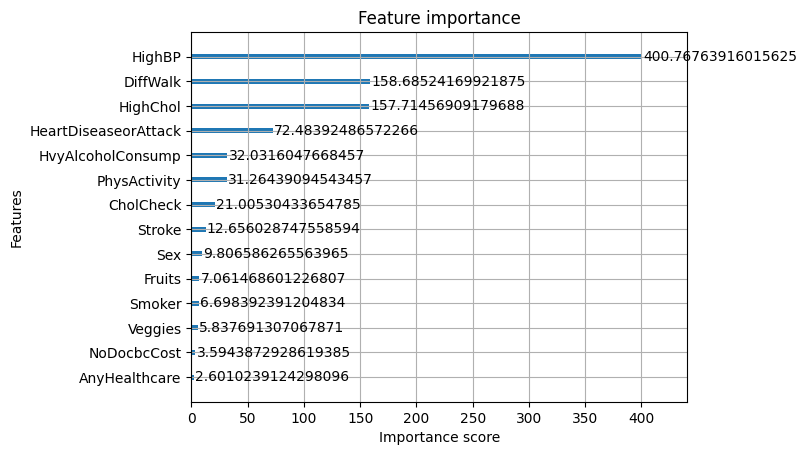

In [36]:
xgb.plot_importance(model, importance_type="gain")
plt.show()

In [38]:
from sklearn.metrics import roc_auc_score
# Assuming 'model' is your trained XGBoost classifier and X_test, y_test are your test data

# Get predicted probabilities for the positive class
y_scores = model.predict_proba(X_test)[:, 1]

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_scores)
print(f"Calculated AUC: {auc_score}")


Calculated AUC: 0.775639874240425


In [27]:
# dca

y_probs = model.predict_proba(X_test)

# Combine with ground truth into a DataFrame for dcurves
df_results = pd.DataFrame({
    'outcome': y_test,
    'xgboost_model': y_probs
})

from dcurves import dca, plot_graphs

# Calculate Net Benefit
dca_results = dca(
    data=df_results,
    outcome='outcome',
    modelnames=['xgboost_model']
)

# Plot the Decision Curve
plot_graphs(dca_results, graph_type='net_benefit')


ValueError: Per-column arrays must each be 1-dimensional